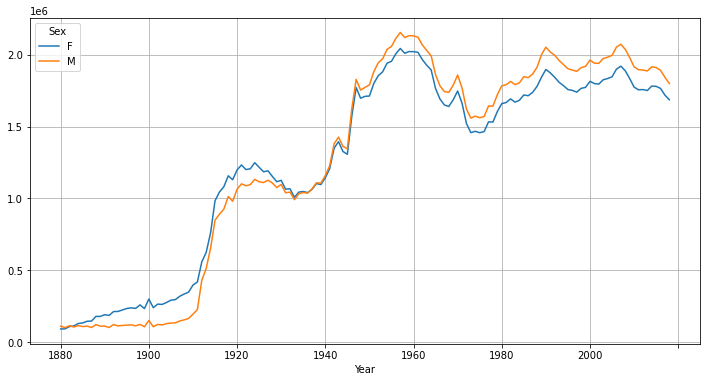

In [19]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

txt_files = glob.glob('./Names/*.txt')

# x = txt_files[1]
# year = []
# li = []
# for i in txt_files:
#     current_year = int(i[-8:-4])
#     year.append(current_year)
#     df = pd.read_csv(i, sep=',', header=None, names=['Name', 'Sex', 'Num'])
#     df["Year"] = current_year
#     li.append(df)
# data = pd.concat(li, ignore_index=True)
# x = data.groupby(['Sex', 'Year']).sum().reset_index()
# y = x.pivot(index='Year', columns='Sex')
# z = y.plot(figsize=(12, 6), grid=True)
# z = y.plot(figsize=(12, 6), grid=True)
# z
#plt.show()
li = []
for i in txt_files:
    year = i[-8:-4]
    df = pd.read_csv(i, sep=',', header=None, names=['Name', 'Sex','Num'])
    li.append(df)
    df['Year'] = year
data = pd.concat(li, ignore_index = True)
sum_sex = data.groupby(['Year', 'Sex']).sum().reset_index()
sum_sex.pivot(index='Year', columns='Sex', values='Num').plot(figsize=(12, 6), grid=True)
plt.show()

In [41]:
top1000 = data.groupby(['Year', 'Sex']).apply(lambda x: x.nlargest(1000,'Num'))
top1000[['Name','Num']]

Name   Num
Year Sex                         
1880 F   0             Mary  7065
         1             Anna  2604
         2             Emma  2003
         3        Elizabeth  1939
         4           Minnie  1746
...                     ...   ...
2018 M   1944037     Korbyn   207
         1944038    Randall   207
         1944039     Benton   206
         1944040    Coleman   206
         1944041     Markus   206

[277877 rows x 2 columns]

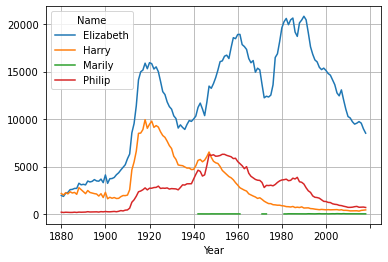

In [60]:
names = ['Philip', 'Harry', 'Elizabeth', 'Marily']
filter_data = data.query('Name in @names').reset_index()
sum_data_name = filter_data.groupby(['Year','Name']).sum().reset_index()
sum_data_name.pivot(index='Year', columns='Name', values='Num').plot(grid=True)